In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from FNORUNet_5layer_model import *

import operator
from functools import reduce
from functools import partial

from timeit import default_timer
import scipy.io
import math
import gc
import glob

In [2]:
with open('_paper_testR2duringtraining_SG.npy', 'rb') as f:
    epochs_SG = np.load(f)
    R2_mean_SG = np.load(f)
    R2_std_SG = np.load(f)
#     R2plume_mean_SG = np.load(f)
#     R2plume_std_SG = np.load(f)
#     delta_t_SG = np.load(f)

In [3]:
with open('_paper_testR2duringtraining_dP.npy', 'rb') as f:
    epochs_dP = np.load(f)
    R2_mean_dP = np.load(f)
    R2_std_dP = np.load(f)
#     R2plume_mean_dP = np.load(f)
#     R2plume_std_dP = np.load(f)
#     delta_t_dP = np.load(f)

In [4]:
startidx=2

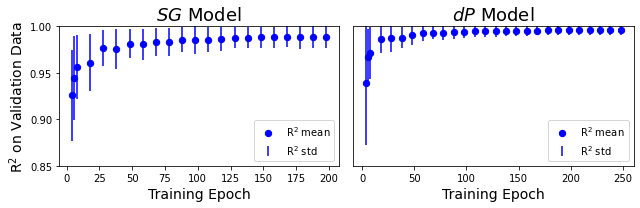

In [12]:
fig = plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
p11 = plt.errorbar(epochs_SG[startidx:], R2_mean_SG[startidx:], R2_std_SG[startidx:], ls='', marker="o", markersize=0, color='b')
p10 = plt.scatter(epochs_SG[startidx:], R2_mean_SG[startidx:], marker="o", s=40, color='b')

plt.xlabel("Training Epoch", size=14)
plt.ylabel("R$^2$ on Validation Data", size=14)
plt.legend([p10, p11], ["R$^2$ mean", "R$^2$ std"], loc='lower right')
plt.title("$SG$ Model", size=18)
plt.ylim(0.85, 1.00)
# plt.yticks([0.80, 0.85, 0.90, 0.95, 1.00], ["0.80", "0.85", "0.90", "0.95", "1.00"])
plt.tight_layout()

plt.subplot(1, 2, 2)
p11 = plt.errorbar(epochs_dP[startidx:], R2_mean_dP[startidx:], R2_std_dP[startidx:], ls='', marker="o", markersize=0, color='b')
p10 = plt.scatter(epochs_dP[startidx:], R2_mean_dP[startidx:], marker="o", s=40, color='b')
# p21 = plt.errorbar(epochs[startidx:], R2plume_mean[startidx:], R2plume_std[startidx:], ls='', marker="s", markersize=0, color='g')
# p20 = plt.scatter(epochs[startidx:], R2plume_mean[startidx:], marker="s", s=40, color='g')

plt.xlabel("Training Epoch", size=14)
# plt.legend([p10, p11, p20, p21], ["R$^2$ Field (mean)", "R$^2$ Field (std)", "R$^2$ Plume (mean)", "R$^2$ Plume (std)"], loc='lower right')
plt.legend([p10, p11], ["R$^2$ mean", "R$^2$ std"], loc='lower right')
plt.title("$dP$ Model", size=18)
plt.ylim(0.85, 1.00)
plt.yticks([])
plt.tight_layout()

# plt.savefig("_paper_testR2duringtraining_final_v2.png", dpi=300)
plt.show()